請參考
#http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html
#http://jjhelmus.github.io/blog/2013/09/17/plotting-nsw-precipitation-data/
#https://home.gamer.com.tw/creationDetail.php?sn=3879309

In [40]:
# -*- coding: utf-8 -*-
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from netCDF4 import Dataset

In [41]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print "\t\ttype:", repr(nc_fid.variables[key].dtype)
            for ncattr in nc_fid.variables[key].ncattrs():
                print '\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr))
        except KeyError:
            print "\t\tWARNING: %s does not contain variable attributes" % key

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print "NetCDF Global Attributes:"
        for nc_attr in nc_attrs:
            print '\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print "NetCDF dimension information:"
        for dim in nc_dims:
            print "\tName:", dim 
            print "\t\tsize:", len(nc_fid.dimensions[dim])
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print "NetCDF variable information:"
        for var in nc_vars:
            if var not in nc_dims:
                print '\tName:', var
                print "\t\tdimensions:", nc_fid.variables[var].dimensions
                print "\t\tsize:", nc_fid.variables[var].size
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [42]:
%matplotlib inline

In [43]:
data = Dataset(u'C:\\Users\\Wang\\Desktop\\AS_work\\air.2015.nc')

In [44]:
ncdump(data)

NetCDF Global Attributes:
	Conventions: u'COARDS'
	title: u'mean daily NMC reanalysis (2014)'
	history: u'created 2013/12 by Hoop (netCDF2.3)'
	description: u'Data is from NMC initialized reanalysis\n(4x/day).  It consists of most variables interpolated to\npressure surfaces from model (sigma) surfaces.'
	platform: u'Model'
	References: u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'
	dataset_title: u'NCEP-NCAR Reanalysis 1'
NetCDF dimension information:
	Name: level
		size: 17
		type: dtype('float32')
		units: u'millibar'
		actual_range: array([ 1000.,    10.], dtype=float32)
		long_name: u'Level'
		positive: u'down'
		GRIB_id: 100
		GRIB_name: u'hPa'
		axis: u'Z'
	Name: lat
		size: 73
		type: dtype('float32')
		units: u'degrees_north'
		actual_range: array([ 90., -90.], dtype=float32)
		long_name: u'Latitude'
		standard_name: u'latitude'
		axis: u'Y'
	Name: lon
		size: 144
		type: dtype('float32')
		units: u'degrees_east'
		long_name: u'Longitude'
		actual_rang

([u'Conventions',
  u'title',
  u'history',
  u'description',
  u'platform',
  u'References',
  u'dataset_title'],
 [u'level', u'lat', u'lon', u'time', u'nbnds'],
 [u'level', u'lat', u'lon', u'time', u'air', u'time_bnds'])

In [45]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
airT = data.variables['air'][:]

In [46]:
lat.shape, lon.shape, airT.shape

((73L,), (144L,), (365L, 17L, 73L, 144L))

In [47]:
minlon = np.min(lon[:])
maxlon = np.max(lon[:])
minlat = np.min(lat[:])
maxlat = np.max(lat[:])

In [48]:
minlon,maxlon,minlat,maxlat

(0.0, 357.5, -90.0, 90.0)

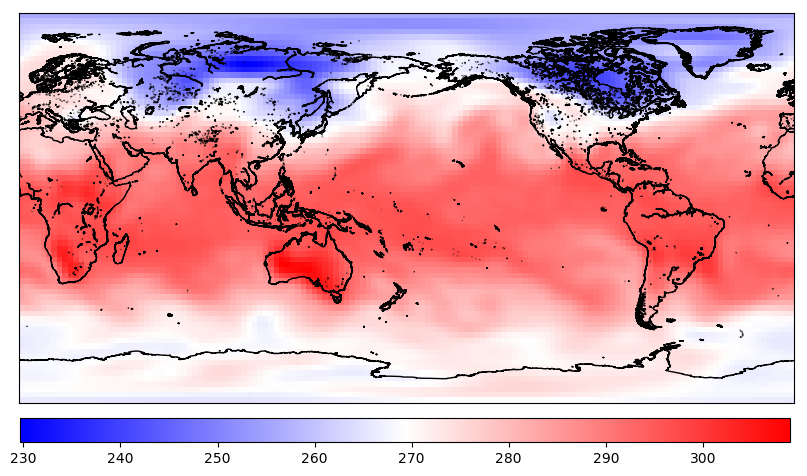

In [66]:
fig = plt.figure(figsize=(10,8),dpi=100)
m = Basemap(llcrnrlon=minlon, llcrnrlat=minlat, urcrnrlon=maxlon, urcrnrlat=maxlat, projection='cyl', resolution='h')
m.drawcoastlines()
#m.contourf(lon[:],lat[:],airT[1,1,:,:])
cs = m.pcolormesh(lon, lat, airT[1,1,:,:], latlon=True,cmap='bwr')
#fig.colorbar(cs, orientation='horizontal')

# Now adding the colorbar
# 嵌套方法一
# figure的百分比, 从figure 20%的位置开始绘制, 宽高是figure的25%
#left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
#ax2 = fig.add_axes([left, bottom, width, height])
cbaxes = fig.add_axes([0.126, 0.21, 0.77, 0.03]) 
cb = plt.colorbar(cs, cax = cbaxes, orientation='horizontal') 